#### ``` Introduction ```

Problem  - Health Insurance is a type of insurance that covers medical expenses. A person who has taken a health insurance policy gets health insurance cover by paying a particular premium amount. There are a lot of factors that determine the premium of health insurance. So  we can use machine learning for predicting the premium of health insurance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### ``` Read Data ```

In [2]:
data = pd.read_csv("Health_insurance.xls")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### ``` Explore Data ```

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.shape

(1338, 7)

In [9]:
target = data['charges']

#### ``` Exploratory data analysis ```

##### Cheak Missing values

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> There is no null value availble in dataset <br>
>Since there is no missing value so we can skip the step for cheaking correlation between null value and target value

##### Temporarl Variable

In [12]:
temporarl_feature = [feature for feature in data.columns if 'Year' in feature or "Yr" in feature ]
temporarl_feature

[]

> There are no Temporaral Feature in dataset

##### Numerical feature

In [17]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_feature

['age', 'bmi', 'children', 'charges']

###### Continous feature

In [18]:
continuous_feature = [feature for feature in numerical_feature if len(data[feature].unique()) > 25]
continuous_feature

['age', 'bmi', 'charges']

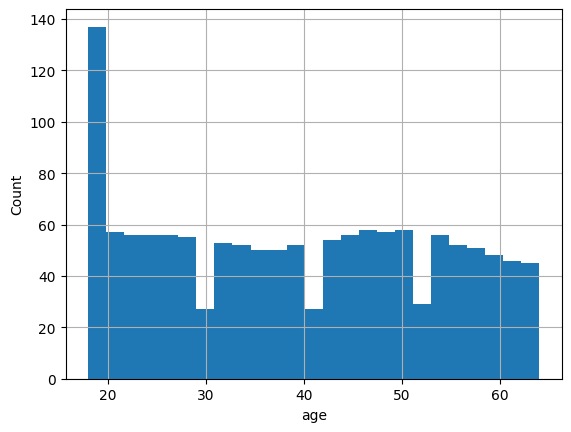

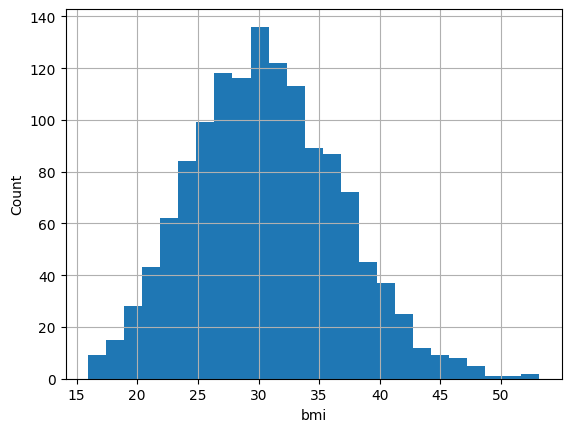

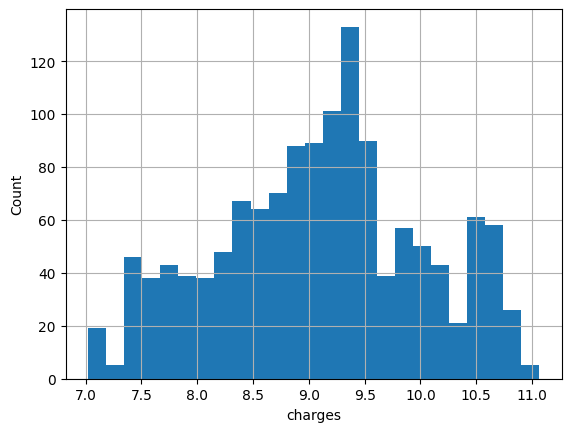

In [34]:
for feature in continuous_feature:
    df = data.copy()
    plt.figure()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.plot

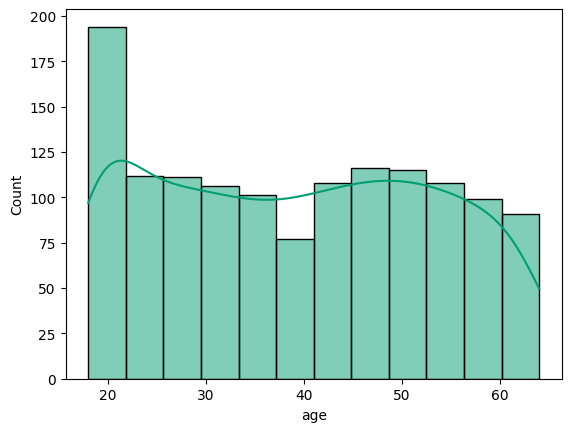

In [35]:
sns.histplot(data["age"], kde=True, color=sns.color_palette('colorblind')[2])
plt.show()

###### Discrete Feature

In [25]:
discrete_fetaure = [feature for feature in numerical_feature if len(data[feature].unique()) < 25 ]
discrete_fetaure

['children']

##### Categorical Feature

In [24]:
print(data['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


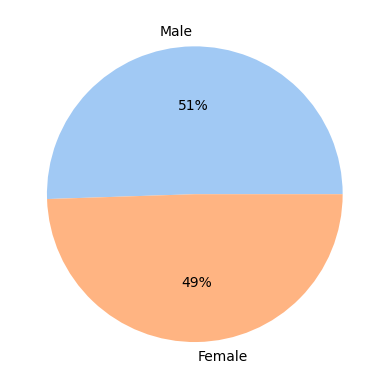

In [57]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(data["sex"].value_counts(), labels=["Male", "Female"], colors=colors, autopct='%.0f%%')
plt.show()


In [58]:
print(data['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


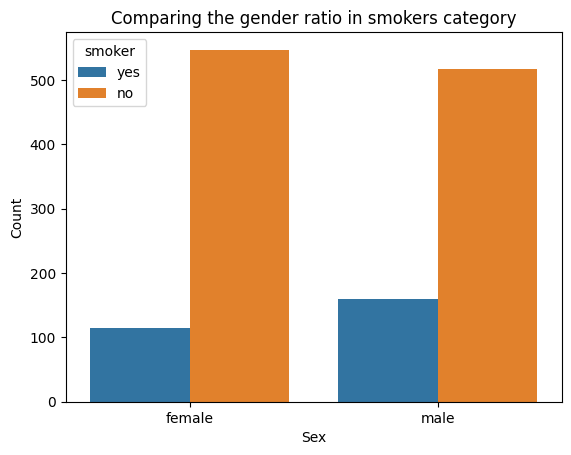

In [60]:
# plt.pie(data["smoker"].value_counts(), labels=["yes","no"])
sns.countplot(data= data, x = "sex", hue = "smoker")
plt.title("Comparing the gender ratio in smokers category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


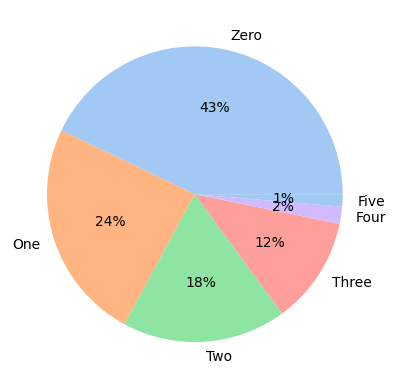

In [62]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(data["children"].value_counts(), labels=["Zero", "One", "Two", "Three", "Four", "Five"],
        colors=colors, autopct='%.0f%%')
plt.show()


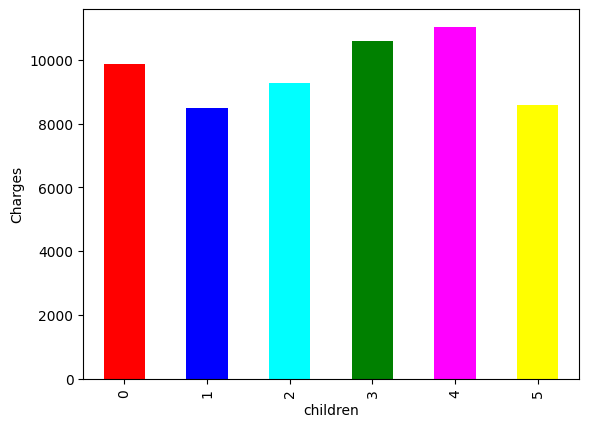

In [32]:
for feature in discrete_fetaure:
    x = data.copy()
    plt.figure()
    x.groupby(feature)["charges"].median().plot.bar(
        color=['red', 'blue', 'cyan', 'green', 'magenta', 'yellow', 'black'])
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.plot()

##### Outliers

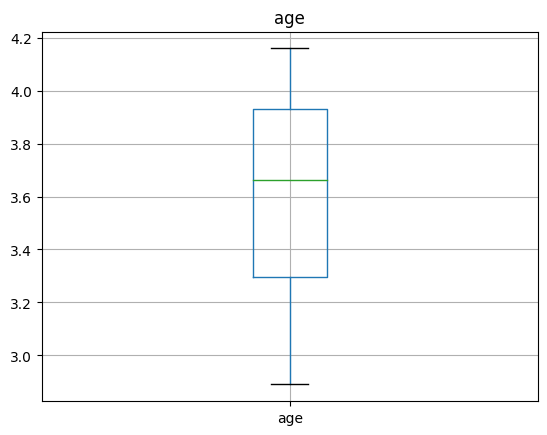

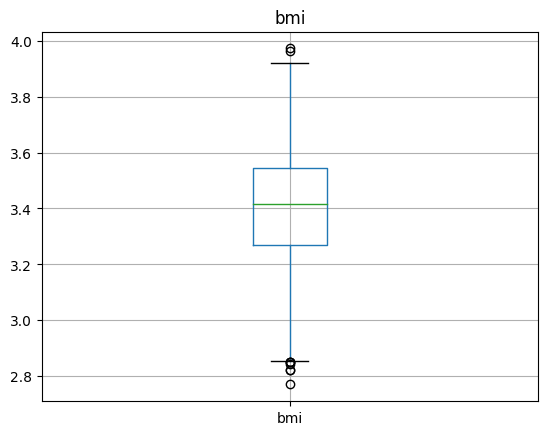

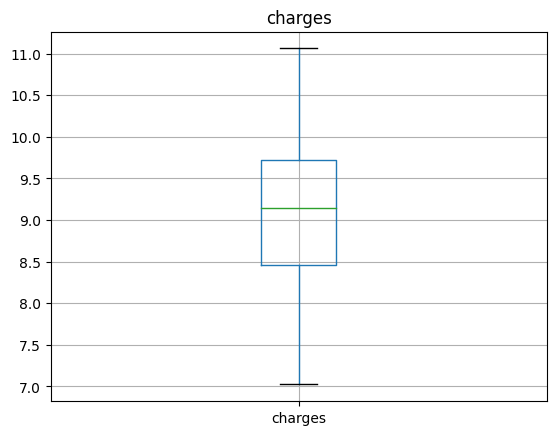

In [33]:
for feature in continues_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()


> Few outliers detected in Bmi

##### Relation between independent and dependent variable

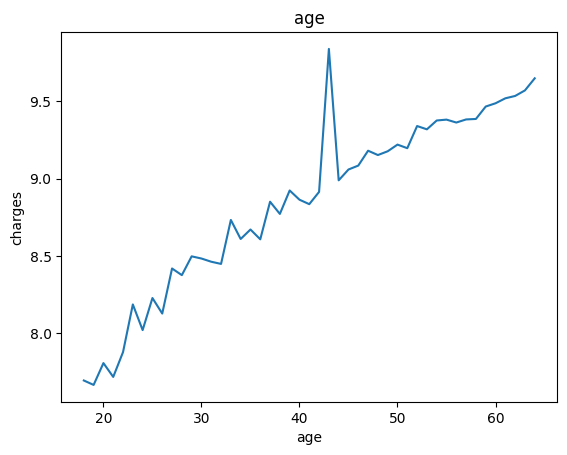

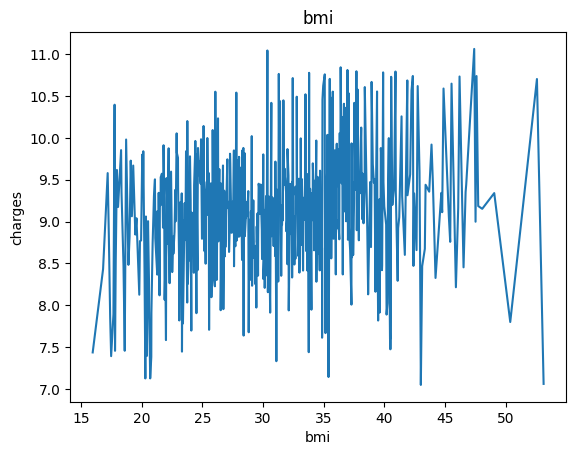

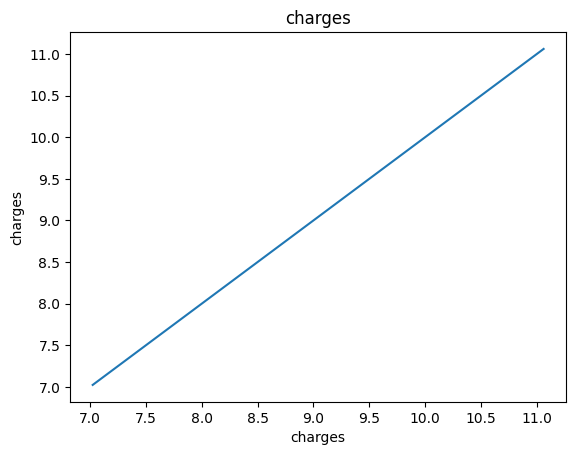

In [43]:
for feature in continues_feature or discrete_fetaure:
    data.groupby(feature)['charges'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.title(feature)
    plt.show()


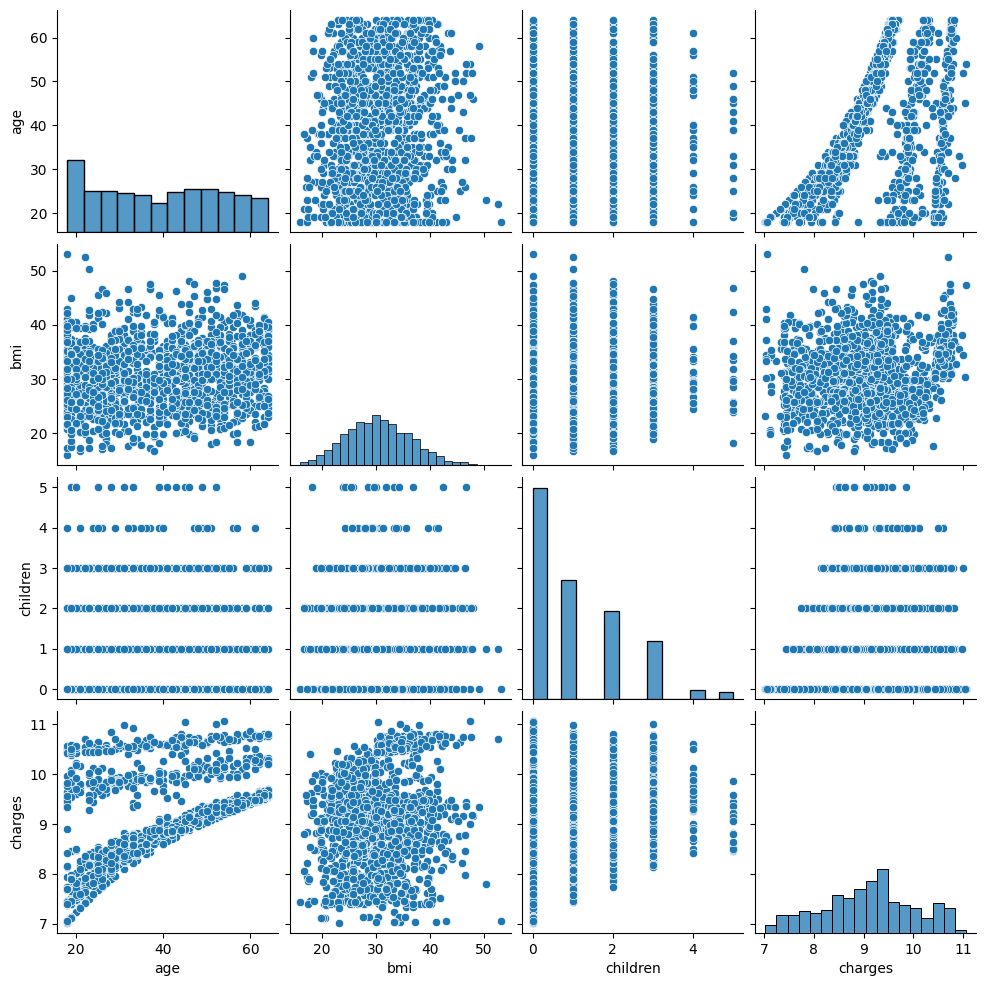

In [46]:
sns.pairplot(data)

C:\Users\Prince\AppData\Local\Temp\ipykernel_2900\1880674000.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

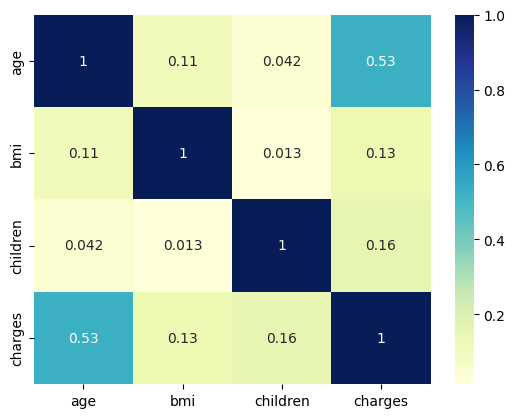

In [54]:
# data.corr()
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# plt.plot(corr)